In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
input_file = "images/modules/72.jpg"
#input_file = "images/modules/112.jpg"
#input_file = "images/modules/126.jpg"
#input_file = "images/modules/130.jpg"
img = cv2.imread(input_file)

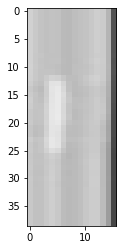

In [3]:
plt.imshow(img)
plt.show()

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

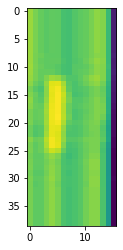

In [5]:
plt.imshow(img_gray)
plt.show()

In [6]:
flatten = img.reshape(-1,3)
flatten_gray = img_gray.reshape(-1,1)

In [7]:
print(flatten.shape)
print(flatten_gray.shape)

(624, 3)
(624, 1)


In [47]:
def get_KMeans_results(inputs):
    from sklearn.cluster import KMeans
    pred = KMeans(n_clusters=5).fit(inputs)
    clusters = []
    for n in range(pred.n_clusters):
        clusters.append(np.array([data.tolist() for label, data in zip(pred.labels_,inputs) if label==n]))
    return clusters, pred

In [48]:
clusters, pred = get_KMeans_results(flatten)
clusters_gray, pred_gray = get_KMeans_results(flatten_gray)

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [50]:
def plot_2d_scatters_for_clusters(pred):
    # センターカラーの取得
    colors = []
    for n in range(pred.n_clusters):
        #color = np.array([0, 0, pred.cluster_centers_[n][0] / 255])
        color = cm.viridis( pred.cluster_centers_[n][0] / 255)        
        colors.append(color)
    # プロット
    fig = plt.figure(figsize=(6,6),facecolor="w")
    ax = fig.add_subplot(1, 1, 1)
    # 軸ラベルの設定
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    # 表示範囲の設定
    ax.set_xlim(0, 255)
    ax.set_ylim(-1, 1)
    for n in range(pred.n_clusters):
        x = clusters[n].reshape(-1)
        y = np.zeros(len(x))
        ax.plot(x, y, "o", color=colors[n], ms=4, mew=0.5)
    plt.show()

In [51]:
def plot_3d_scatters_for_clusters(pred):
    # センターカラーの取得
    colors = []
    for n in range(pred.n_clusters):
        color = pred.cluster_centers_[n] / 255
        colors.append(color)
    # プロット
    fig = plt.figure(figsize=(10,6),facecolor="w")
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    # 軸ラベルの設定
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    # 表示範囲の設定
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
    ax.set_zlim(0, 255)
    for n in range(pred.n_clusters):
        ax.plot(clusters[n][:,0], clusters[n][:,1], clusters[n][:,2], "o", color=colors[n], ms=4, mew=0.5)
    plt.show()

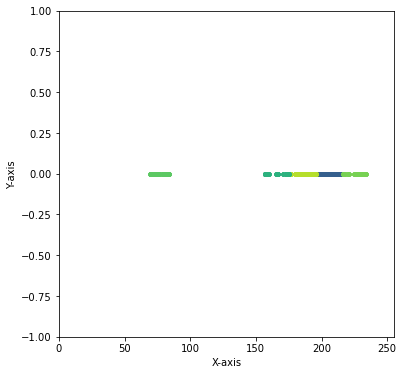

In [52]:
plot_2d_scatters_for_clusters(pred_gray)

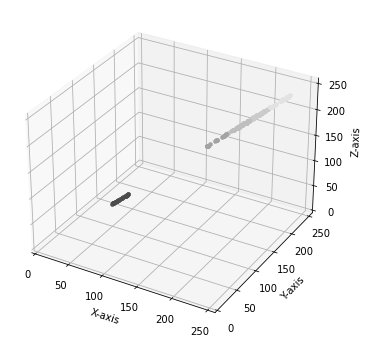

In [53]:
plot_3d_scatters_for_clusters(pred)

In [54]:
centers = np.uint8(pred.cluster_centers_)
clustered_img = centers[pred.labels_]
clustered_img = clustered_img.reshape(img.shape)

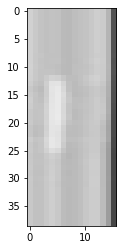

In [55]:
plt.imshow(img)
plt.show()

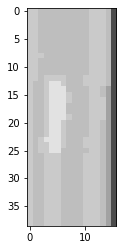

In [56]:
plt.imshow(clustered_img)
plt.show()

In [57]:
centers = np.uint8(pred_gray.cluster_centers_)
clustered_img = centers[pred_gray.labels_]
clustered_img = clustered_img.reshape(img_gray.shape)

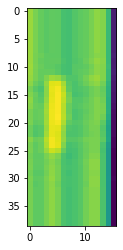

In [58]:
plt.imshow(img_gray)
plt.show()

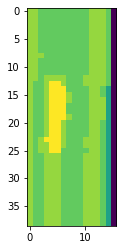

In [59]:
plt.imshow(clustered_img)
plt.show()